In [1]:
# ============================================
# Auto ML Pipeline for Water Quality Dataset
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, LogisticRegression, SGDClassifier
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    r2_score, mean_squared_error, accuracy_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

RANDOM_STATE = 42

In [10]:
# -----------------------------
# STEP 1: Load Data
# -----------------------------


df = pd.read_csv("Combined_dataset.csv")  # use read_csv instead
print("✅ Data loaded. Shape:", df.shape)
print("Columns:", df.columns.tolist())

print("✅ Data loaded. Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Keep only numeric columns for modeling
numeric_df = df.select_dtypes(include=[np.number]).dropna().reset_index(drop=True)
print(f"Using {len(numeric_df.columns)} numeric columns for modeling.")

# -----------------------------
# Helper Functions
# -----------------------------
def evaluate_regression(name, model, X_train, X_val, X_test, y_train, y_val, y_test, target):
    model.fit(X_train, y_train)
    preds_val = model.predict(X_val)
    preds_test = model.predict(X_test)

    print(f"\n📊 {name} Results for {target}:")
    print("Validation R²:", r2_score(y_val, preds_val))
    print("Test R²:", r2_score(y_test, preds_test))
    print("Validation MSE:", mean_squared_error(y_val, preds_val))
    print("Test MSE:", mean_squared_error(y_test, preds_test))

    # Plot Actual vs Predicted
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, preds_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - {target} (Test Set)")
    plt.show()

def evaluate_classification(name, model, X_train, X_val, X_test, y_train, y_val, y_test, target):
    model.fit(X_train, y_train)
    preds_val = model.predict(X_val)
    preds_test = model.predict(X_test)

    print(f"\n📈 {name} Results for {target}:")
    print("Validation Accuracy:", accuracy_score(y_val, preds_val))
    print("Test Accuracy:", accuracy_score(y_test, preds_test))
    print("Validation F1:", f1_score(y_val, preds_val))
    print("Test F1:", f1_score(y_test, preds_test))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds_test)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix ({target})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


✅ Data loaded. Shape: (1048575, 14)
Columns: ['Country', 'Area', 'Waterbody Type', 'Date', 'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)', 'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)', 'pH (ph units)', 'Temperature (cel)', 'Nitrogen (mg/l)', 'Nitrate (mg/l)', 'CCME_Values', 'CCME_WQI']
✅ Data loaded. Shape: (1048575, 14)
Columns: ['Country', 'Area', 'Waterbody Type', 'Date', 'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)', 'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)', 'pH (ph units)', 'Temperature (cel)', 'Nitrogen (mg/l)', 'Nitrate (mg/l)', 'CCME_Values', 'CCME_WQI']
Using 9 numeric columns for modeling.



🎯 Now modeling target: Ammonia (mg/l)

📊 Linear Regression Results for Ammonia (mg/l):
Validation R²: 0.28759585602822624
Test R²: 0.27659393191378523
Validation MSE: 28.681758474908506
Test MSE: 31.580888047335574


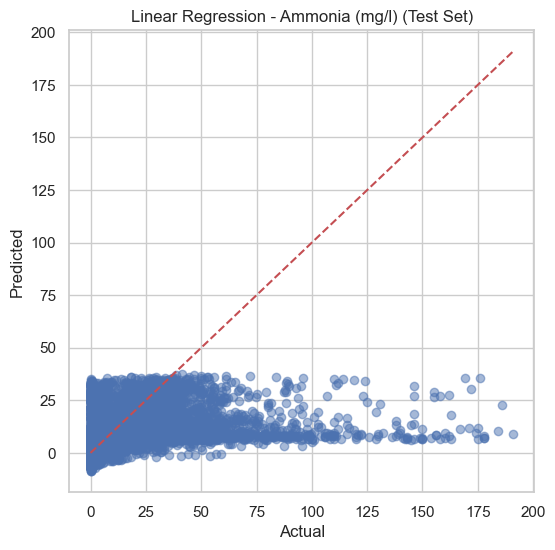


📊 Ridge Regression Results for Ammonia (mg/l):
Validation R²: 0.2875998181123658
Test R²: 0.27659530071340555
Validation MSE: 28.6815989593564
Test MSE: 31.580828291260143


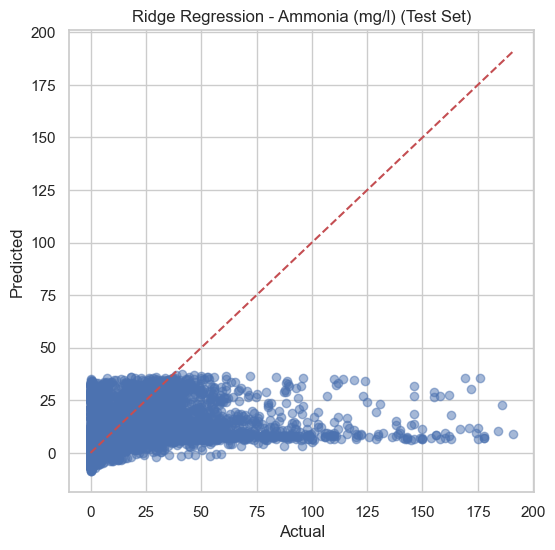

Best Ridge α: {'alpha': 100}

📊 Lasso Regression Results for Ammonia (mg/l):
Validation R²: 0.2876084051957719
Test R²: 0.2765903278729601
Validation MSE: 28.681253238947075
Test MSE: 31.58104538470781


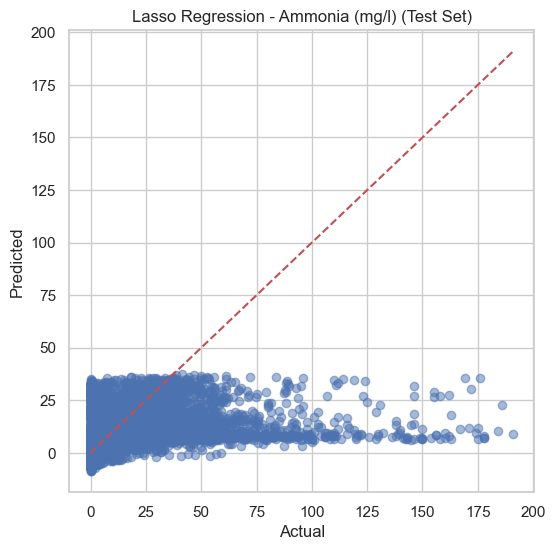

Best Lasso α: {'alpha': 0.001}

📈 Logistic Regression Results for Ammonia (mg/l):
Validation Accuracy: 0.7537797388197297
Test Accuracy: 0.7517213755745866
Validation F1: 0.7299880775586187
Test F1: 0.7263093711233994


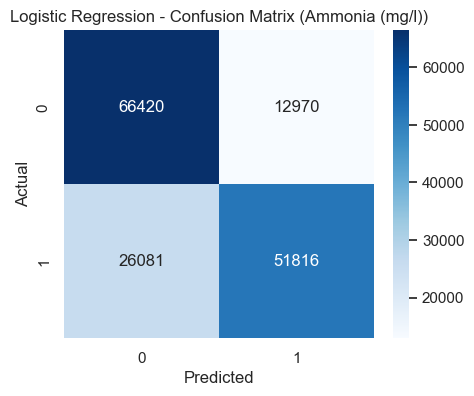

Best Logistic Params: {'C': 10, 'solver': 'lbfgs'}

📈 Random Forest Results for Ammonia (mg/l):
Validation Accuracy: 0.84249710718055
Test Accuracy: 0.8400948584434823
Validation F1: 0.8337639156371836
Test F1: 0.8305337133539514


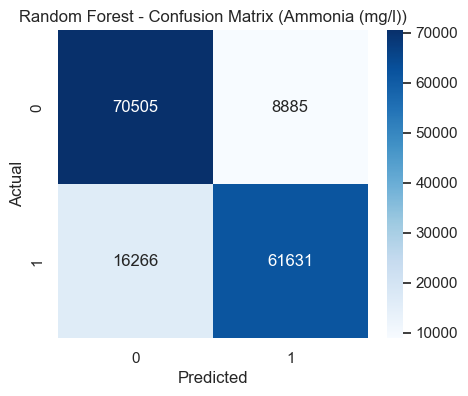

Best RF Params: {'max_depth': 20, 'n_estimators': 200}

📈 SGD Classifier Results for Ammonia (mg/l):
Validation Accuracy: 0.7506453212619051
Test Accuracy: 0.7491337491337491
Validation F1: 0.7202527853464387
Test F1: 0.7167327130714449


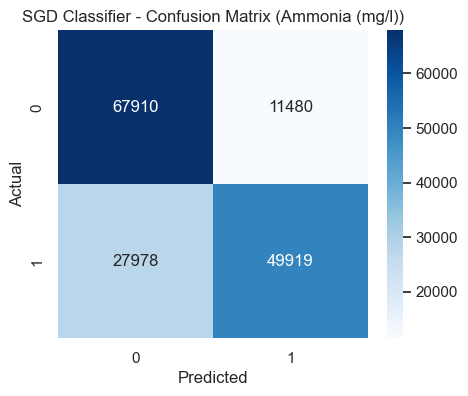

Best SGD α: {'alpha': 0.001}

🎯 Now modeling target: Biochemical Oxygen Demand (mg/l)

📊 Linear Regression Results for Biochemical Oxygen Demand (mg/l):
Validation R²: 0.2222737558283583
Test R²: 0.21723776625873215
Validation MSE: 261.82116976429046
Test MSE: 251.7367968515008


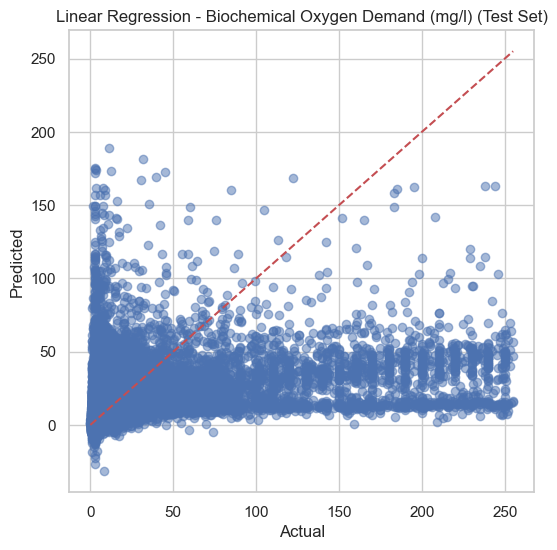


📊 Ridge Regression Results for Biochemical Oxygen Demand (mg/l):
Validation R²: 0.222271497179099
Test R²: 0.21723845108397244
Validation MSE: 261.8219301374881
Test MSE: 251.7365766112989


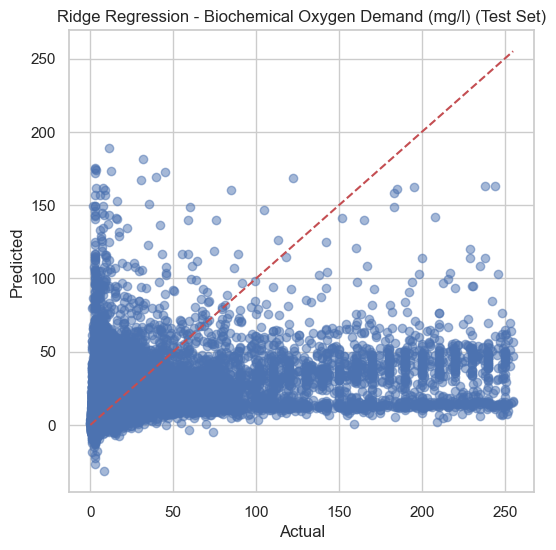

Best Ridge α: {'alpha': 100}

📊 Lasso Regression Results for Biochemical Oxygen Demand (mg/l):
Validation R²: 0.22227018217697125
Test R²: 0.21723928564305162
Validation MSE: 261.8223728323282
Test MSE: 251.73630821660592


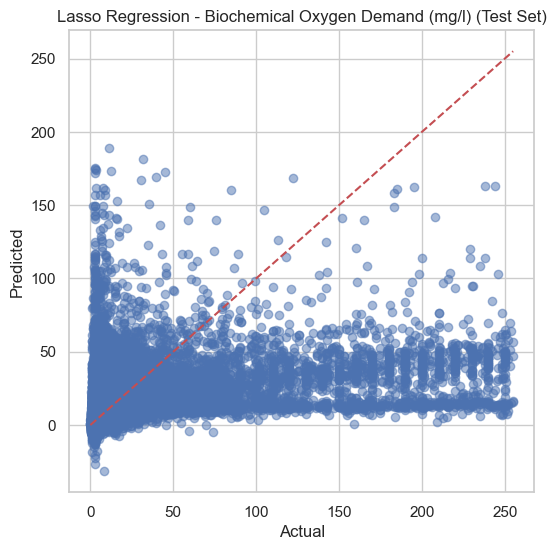

Best Lasso α: {'alpha': 0.001}

📈 Logistic Regression Results for Biochemical Oxygen Demand (mg/l):
Validation Accuracy: 0.7867833119285886
Test Accuracy: 0.7867401628869519
Validation F1: 0.6563934426229509
Test F1: 0.6532270570356357


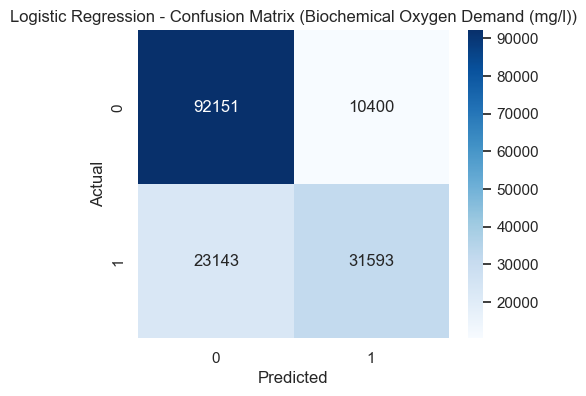

Best Logistic Params: {'C': 10, 'solver': 'liblinear'}


In [ ]:

# -----------------------------
# STEP 2: Loop through each numeric column as target
# -----------------------------
for target in numeric_df.columns:
    print("\n" + "="*80)
    print(f"🎯 Now modeling target: {target}")
    print("="*80)

    X = numeric_df.drop(columns=[target])
    y = numeric_df[target]

    # Skip if y has no variation
    if y.nunique() < 5:
        print(f"Skipping {target} (too few unique values).")
        continue

    # Split into train/val/test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE)

    # Scale data
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s = scaler.transform(X_val)
    X_test_s = scaler.transform(X_test)

    # -------------------------
    # REGRESSION MODELS
    # -------------------------
    lin = LinearRegression()
    evaluate_regression("Linear Regression", lin, X_train_s, X_val_s, X_test_s, y_train, y_val, y_test, target)

    ridge = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='r2')
    ridge.fit(X_train_s, y_train)
    evaluate_regression("Ridge Regression", ridge.best_estimator_, X_train_s, X_val_s, X_test_s, y_train, y_val, y_test, target)
    print("Best Ridge α:", ridge.best_params_)

    lasso = GridSearchCV(Lasso(max_iter=5000), {'alpha': [0.001, 0.01, 0.1, 1, 10]}, cv=5, scoring='r2')
    lasso.fit(X_train_s, y_train)
    evaluate_regression("Lasso Regression", lasso.best_estimator_, X_train_s, X_val_s, X_test_s, y_train, y_val, y_test, target)
    print("Best Lasso α:", lasso.best_params_)

    # -------------------------
    # CLASSIFICATION MODELS
    # -------------------------
    # Make a binary version of the target
    y_bin = (y > y.median()).astype(int)
    X_train_c, X_temp_c, y_train_c, y_temp_c = train_test_split(X, y_bin, test_size=0.3, random_state=RANDOM_STATE)
    X_val_c, X_test_c, y_val_c, y_test_c = train_test_split(X_temp_c, y_temp_c, test_size=0.5, random_state=RANDOM_STATE)

    scaler_c = StandardScaler()
    X_train_c_s = scaler_c.fit_transform(X_train_c)
    X_val_c_s = scaler_c.transform(X_val_c)
    X_test_c_s = scaler_c.transform(X_test_c)

    # Logistic Regression
    log_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    log = GridSearchCV(LogisticRegression(max_iter=1000), log_params, cv=5, scoring='accuracy')
    log.fit(X_train_c_s, y_train_c)
    evaluate_classification("Logistic Regression", log.best_estimator_, X_train_c_s, X_val_c_s, X_test_c_s, y_train_c, y_val_c, y_test_c, target)
    print("Best Logistic Params:", log.best_params_)

    # Random Forest
    rf = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE),
                      {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}, cv=5, scoring='accuracy')
    rf.fit(X_train_c_s, y_train_c)
    evaluate_classification("Random Forest", rf.best_estimator_, X_train_c_s, X_val_c_s, X_test_c_s, y_train_c, y_val_c, y_test_c, target)
    print("Best RF Params:", rf.best_params_)

    # SGD Classifier
    sgd = GridSearchCV(SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_STATE),
                       {'alpha': [0.0001, 0.001, 0.01]}, cv=5, scoring='accuracy')
    sgd.fit(X_train_c_s, y_train_c)
    evaluate_classification("SGD Classifier", sgd.best_estimator_, X_train_c_s, X_val_c_s, X_test_c_s, y_train_c, y_val_c, y_test_c, target)
    print("Best SGD α:", sgd.best_params_)

print("\n✅ All modeling complete!")
